# Problems 11 - K-means Clustering

## 11.1 Understanding Normal distributions

The data below come from different Gaussian distributions. The data is given in separate csv files. Can you guess, through trial and error, what are the parameters of the distribution that gave rise to each plot?

![Image of 4 plots](1.png)

We will re-create the plots one by one using the files we were given, and then try to adjust the parameters of our own Gaussian to fit what we see.

<font color=blue>Question 8.1 (a) - top left plot</font>

In [154]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [155]:
#Read in one of the files
with open('1a.csv') as csvfile:
    reader = csv.reader(csvfile) 
    rows = [x for x in reader]

#Split the rows into columns and convert to floats
x1 = [float(row[0]) for row in rows]
x2 = [float(row[1]) for row in rows]

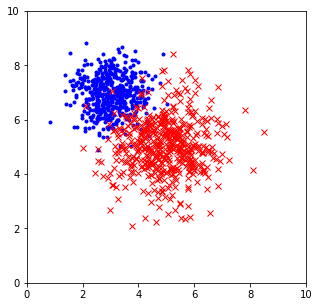

In [156]:
#Plot the contents as blue dots
plt.figure(figsize = (5,5))
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.plot(x1, x2, 'b.')

#Define the parameters for our Normal distribution:

#CHANGE THESE PARAMETERS AS YOU SEE FIT
mean = [5, 5]
cov = np.array([[1.0,  0.0],
                [0.0,  1.0]])

#Sample 500 points form the above Normal distribution and plot them as red crosses
our_x1, our_x2 = np.random.multivariate_normal(mean, cov, 500).T

plt.plot(our_x1, our_x2, 'rx')

<font color=blue>Now repeat for Questions (b), (c) and (d).</font>

In [157]:
# YOUR CODE HERE #


## 11.2 Applying K-means

We are given some data in the file "2.csv" that comprise 2000 data points of 2 features each. Let's first open the file and import all the data.

We have imported 2000 data points, of 2 features each


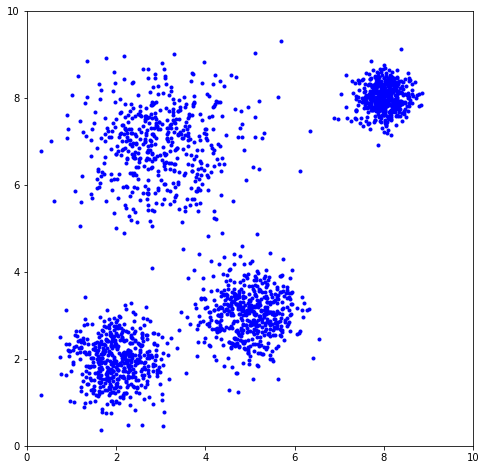

In [158]:
x = []

with open('2.csv') as csvfile:
    reader = csv.reader(csvfile) 
    for row in reader:
        x.append([float(row[0]), float(row[1])])

# Convert x into a numpy array
x = np.array(x)

# Let's see what we imported
print("We have imported {} data points, of {} features each".format(x.shape[0], x.shape[1]))

#Plot the contents as blue dots
plt.figure(figsize = (8,8))
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.plot(x[:,0], x[:,1], 'b.')

<font color=blue>How many clusters do you see in the distribution?</font>

---

*YOUR RESPONSE HERE*

---


We will now run the K-Means algorithm with number of clusters k = 2. We will be using the `KMeans` library of `sklearn`

In [159]:
# K-means clustering
from sklearn.cluster import KMeans

#Fix the number of clusters we want
k = 2

km = KMeans(n_clusters = k, max_iter=100, n_init=1, verbose=False)
km.fit(x)

centers = km.cluster_centers_
print("Centers: {0}".format(centers))

Centers: [[3.28888236 3.81984021]
 [7.63367149 7.98382036]]


Now we can plot again the points and the centers we have found in a single plot

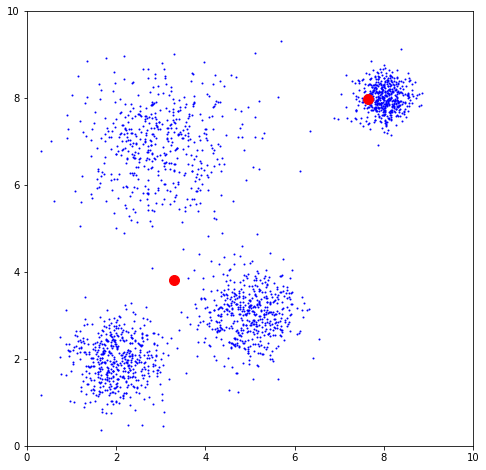

In [160]:
#Plot the contents as blue dots
plt.figure(figsize = (8,8))
plt.xlim(0, 10)
plt.ylim(0, 10)

#Plot points
plt.plot(x[:,0], x[:,1], '.', markersize=2, color="blue")

#Plot centers
plt.plot(centers[:,0], centers[:,1],'o', markersize=10, color="red")

<font color=blue>Run again the code above. Do you always get the same results? What happens if you change the number of iterations?</font>

---

*YOUR RESPONSE HERE*

---


<font color=blue>Check what the `n_init` parameter is doing and adjust it to get a more stable solutions</font>

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [161]:
# YOUR CODE HERE


To "classify" our samples we can run the `predict` method of `KMeans`. This will return a column vector with a  label for each data point.

In [162]:
y = km.predict(x)
print(y)

[0 0 0 ... 1 1 1]


We can use the labels to colour the points in different colours.

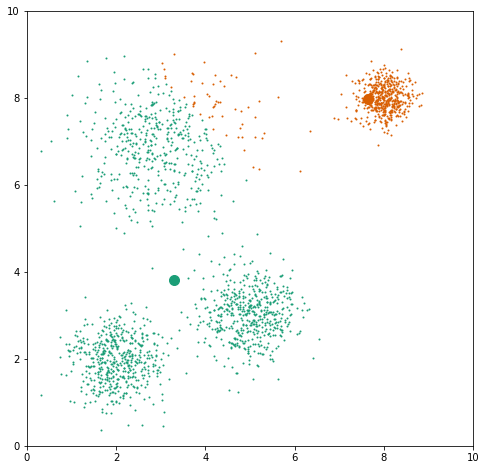

In [163]:
#Plot the contents as coloured dots
plt.figure(figsize = (8,8))
plt.xlim(0, 10)
plt.ylim(0, 10)

colorMap = plt.get_cmap("Dark2")
for i in np.arange(0, centers.shape[0]):
    #Plot points
    plt.plot(x[y == i,0], x[y == i,1], '.', markersize=2, color=colorMap(i))

    #Plot centers
    plt.plot(centers[i,0], centers[i,1],'o', markersize=10, color=colorMap(i))

How good is the above fit? We can calculate a number, given that the cost is defined as:

$J=\sum_{n=1}^{N} \sum_{k=1}^{K} r_{nk}  \left\lVert \mathbf{x^{(n)}}-\mathbf{\mu_k} \right\rVert ^2$

In [164]:
j = 0

for i in np.arange(0, x.shape[0]):
    j += pow(x[i,0]-centers[y[i],0], 2) + pow(x[i,1]-centers[y[i],1], 2)

print(j)

10358.728556240472


<font color=blue>Repeat this process for values of k between 3 and 5, and make the plots.</font>

In [165]:
# YOUR CODE HERE


<font color=blue>Do k-means clustering for values of k between 3 and 15 and calculate the cost in each case.</font>

<font color=blue>Then make a plot of the calculated costs against the k used. You should get a figure similar to the one below: </font>

![Plot of costs against k](Elbow.png)

In [166]:
# YOUR CODE HERE


<font color=blue>What would be a good value for k given the plot above?</font>

---

*We are looking for the "elbow" point, where subsequent changes do not seem to contribute significantly. K=4 would be a good candidate given this plot.*

---